Mendownload dataset cats and dogs #jika menggunakan google colab

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


Mengekstrak dataset #jika menggunakan google colab

In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/cats_and_dogs_filtered.zip'

Mengaktifkan Google drive #jika menggunakan google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/tmp/cats_and_dogs_filtered"

train  validation  vectorize.py


Salin dataset ke google drive #jika menggunakan google colab

In [14]:
!cp -av "/tmp/cats_and_dogs_filtered" "dataset"

'cp' is not recognized as an internal or external command,
operable program or batch file.


Set directory


In [ ]:
# base_dir = '/content/drive/My Drive/Colab Notebooks/tutorial/dataset/cats_and_dogs_filtered' #jika menggunakan google colab
base_dir = 'dataset/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Melihat isi dataset

In [37]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [38]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 223
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [39]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

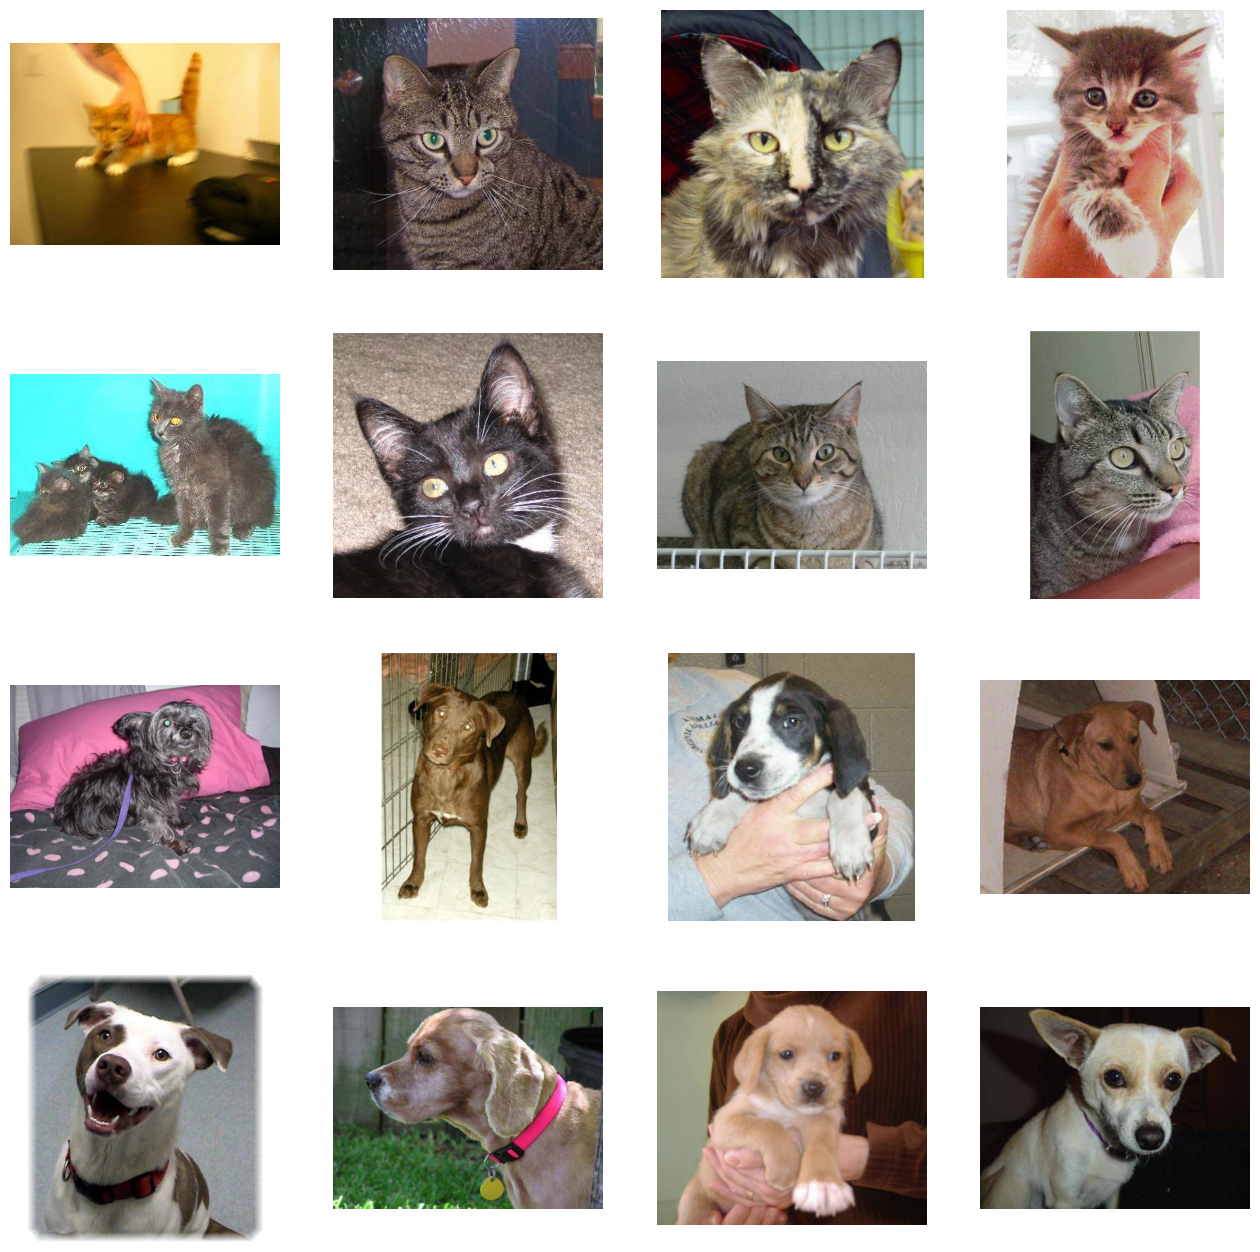

In [40]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Import library tensorflow

In [41]:
from tensorflow.keras import layers
from tensorflow.keras import Model

Setting arsitektur CNN (Konvolusi)

In [42]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Setting arsitektur CNN (Fully Connected)

In [43]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully
# connected layer + sigmoid output layer
model = Model(img_input, output)

Compile CNN

In [44]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])


Setting preparasi dataset

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1223 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Proses training

In [47]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 gambar = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 gambar = batch_size * steps
      verbose=2)


Epoch 1/15
100/100 - 9s - 89ms/step - acc: 0.8177 - loss: 0.4744 - val_acc: 0.5000 - val_loss: 0.9349
Epoch 2/15
100/100 - 6s - 61ms/step - acc: 0.8217 - loss: 0.4393
Epoch 3/15
100/100 - 9s - 86ms/step - acc: 0.8316 - loss: 0.4185 - val_acc: 0.5490 - val_loss: 0.6924
Epoch 4/15
100/100 - 6s - 64ms/step - acc: 0.8406 - loss: 0.3852
Epoch 5/15
100/100 - 8s - 78ms/step - acc: 0.8602 - loss: 0.3573 - val_acc: 0.5690 - val_loss: 0.7588
Epoch 6/15
100/100 - 6s - 61ms/step - acc: 0.8610 - loss: 0.3175
Epoch 7/15
100/100 - 9s - 85ms/step - acc: 0.8896 - loss: 0.2636 - val_acc: 0.5540 - val_loss: 1.4305
Epoch 8/15
100/100 - 6s - 56ms/step - acc: 0.8945 - loss: 0.2452
Epoch 9/15
100/100 - 8s - 77ms/step - acc: 0.9256 - loss: 0.1946 - val_acc: 0.6340 - val_loss: 0.9078
Epoch 10/15
100/100 - 6s - 58ms/step - acc: 0.9518 - loss: 0.1412
Epoch 11/15
100/100 - 8s - 85ms/step - acc: 0.9608 - loss: 0.1044 - val_acc: 0.6580 - val_loss: 1.1293
Epoch 12/15
100/100 - 6s - 57ms/step - acc: 0.9755 - loss: 0.

Menampilkan hasil tiap langkah

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


C:\Users\USER\AppData\Local\Temp\ipykernel_18632\360889691.py:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\USER\AppData\Local\Temp\ipykernel_18632\360889691.py:46: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


Menampilkan grafik selama pelatihan

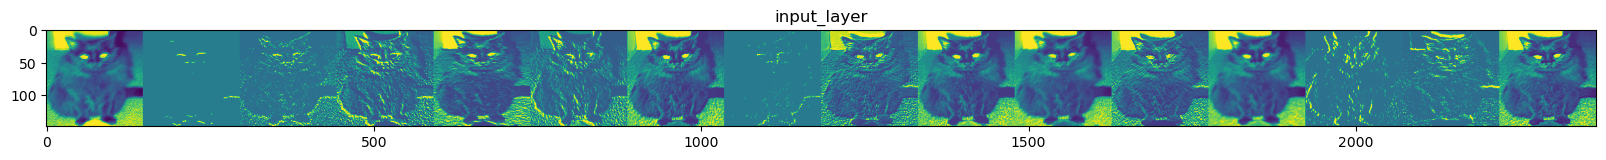

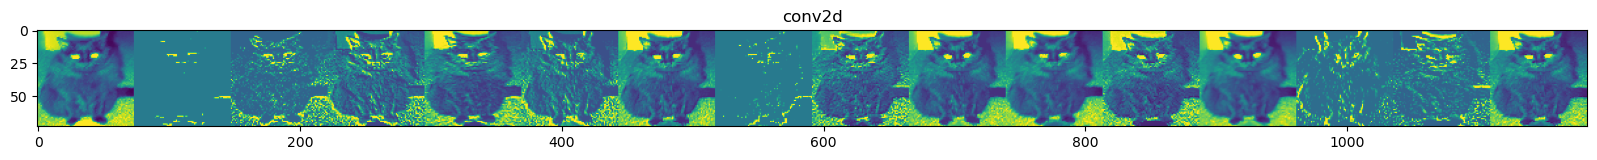

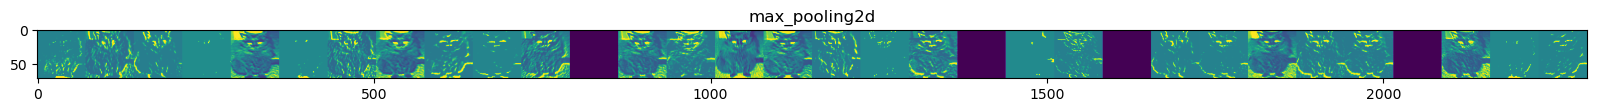

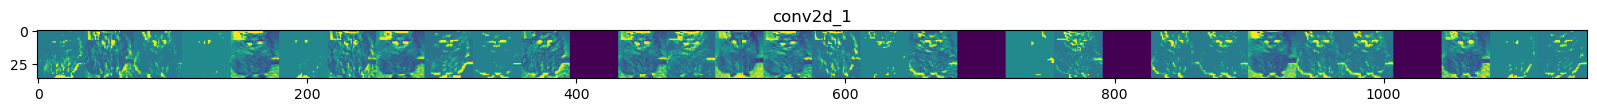

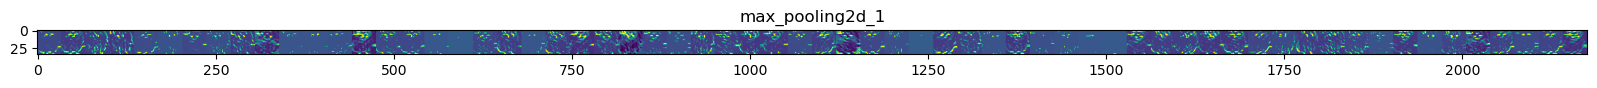

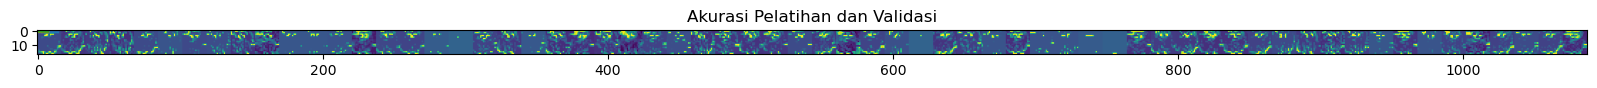

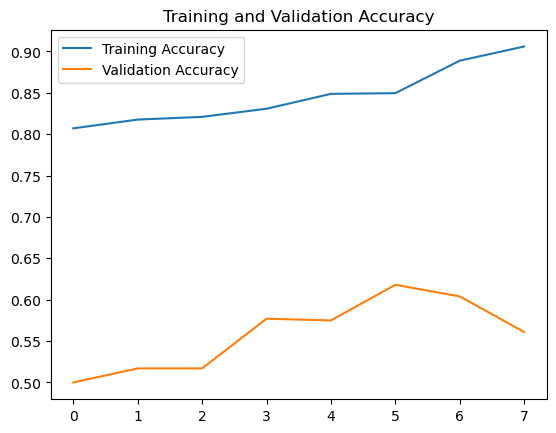

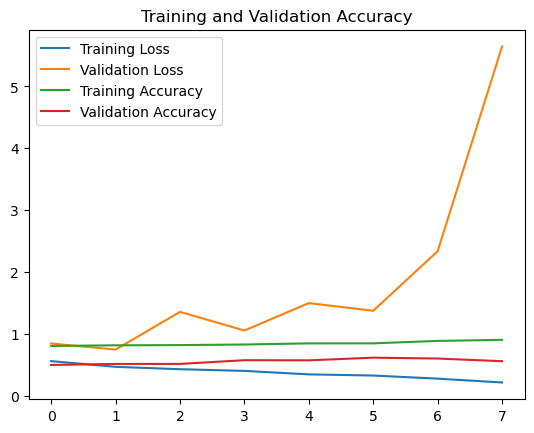

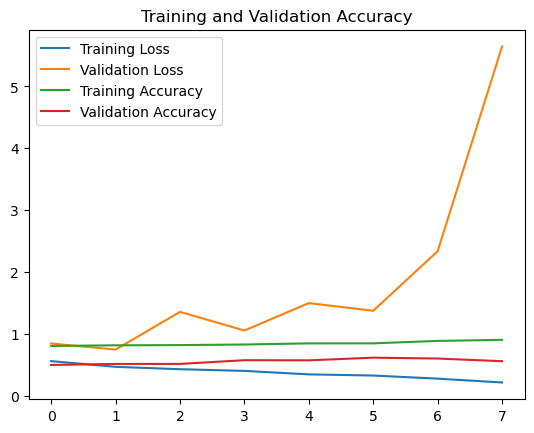

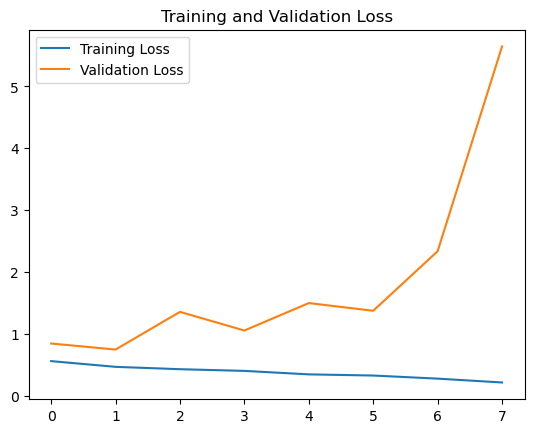

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Ensure the lengths match before plotting
min_epochs = min(len(acc), len(val_acc))  # Take the smaller length
epochs = range(min_epochs)  # Adjust the range of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc[:min_epochs], label='Training Accuracy')
plt.plot(epochs, val_acc[:min_epochs], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss[:min_epochs], label='Training Loss')
plt.plot(epochs, val_loss[:min_epochs], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Display the plots
plt.show()


In [ ]:
# Menyimpan model
model.save('static/models/testmodel/dog_catM.h5')
print("Model berhasil disimpan sebagai 'dog_catM.h5'")